# The Language of Dickens Across Class and Gender
### by Malvina Clavering, Albert Manrique, and Jacob Prisament

## Introduction

Charles Dickens is one of the best-known authors of the nineteenth century. He is the creator of such iconic characters as Ebenezer Scrooge, Nicholas Nickelby, and the Artful Dodger. His novels are celebrated for their poignant depictions of the hardships of the Victorian lower class. Dickens was a prolific writer, from novels to short stories and essays, leaving us today with a rich body of work. Thanks to the size of his oeuvre, we can learn a great deal about Dickens’ style–the size of his vocabulary, the words he tends to use and in what contexts–by analyzing his language. This leads us to wonder, can trends in Dickens’ word choice reveal something about his opinions?

In this project, we aim to expand the use of computational language processing tools to analyze Dickens’ opinions of certain people groups, categorized by occupation. Across all his novels, does Dickens reveal a dislike for clergymen? Does he appear to have a remarkable respect for grocers? By examining the descriptors that Dickens uses to refer to various professions, we will attempt to glean his attitudes towards people of different social standing, gender, and occupation. Through this analysis we hope to reveal potential biases in the author’s writing, which can give us another lens for studying his work. While we know that in many respects Dickens was a writer who sought to lift up the lower class by casting a light on the sufferings of these members of society, there may be nuance in how members of different groups were viewed by him. Trends in Dickens’ writing may also illuminate parts of his past. For example, his time spent working for the courts in the early days of his career is suggested to have fostered a low opinion of lawyers, which is evident in some of his books. 

Performing this type of style analysis can be valuable for deepening our understanding of an author, especially one so heavily studied and widely celebrated as Dickens. Additionally, the methods used in this project could be expanded to learn about other authors whose language may reflect an entirely different set of values and opinions. This gives additional context for literary and historical scholarship. The benefits of performing text analysis using computational tools, beyond efficiency, is the ability to accumulate quantitative data in a field that is largely reliant on qualitative approaches.

The overall approach to performing this analysis is as follows:
- Collect raw text data from the Project Gutenberg database, using python’s requests library. 
- Clean the data to remove non-english, duplicate and non-literature files. Also remove all headings and text not part of the work.
- Use NLTK to break data into word and punctuation tokens.
- Break text into sentences to scope context for keywords, these keywords are a list of professions and their synonyms. We refer to each list of synonyms as a word category.
- Find all occurrences of a given list of keywords, synonyms arranged by professional category.

## Methodology

ring Data
To obtain the data used in this project, we used the python libraries Requests and Pandas to  download a series of text files from the Project Gutenberg database. Using Pandas, we can read through the Project Gutenberg catalog in the form of a csv file (called pg_catalog.csv). We read through the “Author” column of this file to search for all occurrences of “Dickens, Charles” then used the index of each item to find the corresponding unique number of the text. This number is used with a regular URL format that allows us to access and download each book in the catalog written by Dickens. 
Run the code below to import the necessary libraries and files used.


In [1]:
from WordBank import word_bank
from text_analysis import *
from visualization import *

[nltk_data] Downloading package punkt to
[nltk_data]     /home/malvinaclavering/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/malvinaclavering/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/malvinaclavering/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/malvinaclavering/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/malvinaclavering/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Cleaning the Data
Each of these texts is written to a file in the folder called BooksRaw, they are now recognizable as readable ebooks. However, there is a great deal of text that is not written by Dickens at the beginning of the book, such as copyright information and the Project Gutenberg headers. We need to “clean” the texts so that we are sure we are looking at only Dickens’ writing. Thankfully, by looking at the raw text, we can see that each book start with the following heading:
*** START OF THE PROJECT GUTENBERG EBOOK A TALE OF TWO CITIES ***
and ends with:
*** END OF THE PROJECT GUTENBERG EBOOK A TALE OF TWO CITIES ***
but with the book title being different for each book. We can therefore iterate through the lines in the text and trim the text starting at the line containing “START OF THE PROJECT GUTENBERG EBOOK” and ending at the line before “END OF THE PROJECT GUTENBERG EBOOK”. 

### Text Analysis
The two primary tools used for analyzing the text are dependency parsing and sentiment scoring, these functionalities are included in certain natural language processing packages. The natural language packages used here are NLTK (Natural Language Toolkit) and spaCy. Our goal was to use these tools along with basic python functionalities to find a list of descriptors for any word or group of words, and then score those words based on their level of positive, negative or neutral sentiment. 
	
Most language processing requires breaking up text into tokens, so the sentence  "It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife" would be broken up like below:

In [2]:
sentence = "It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife."
tokens = nltk.word_tokenize(sentence)
print(tokens)

['It', 'is', 'a', 'truth', 'universally', 'acknowledged', ',', 'that', 'a', 'single', 'man', 'in', 'possession', 'of', 'a', 'good', 'fortune', ',', 'must', 'be', 'in', 'want', 'of', 'a', 'wife', '.']


This outputs a list of strings (tokens) which are units of text (words and punctuation). 

We can then label each of these tokens with their part of speech. For our implementation of POS tagging, we used spaCy. 

We can now tell the computer to read through the tagged and tokenized text to find all words that are tagged as adjectives, (ADJ). Let’s say we wanted to find descriptors of the word “man” in the previous sentence, we can write code to scan through the sentence and find occurrences of “man”, then look for words that are modifying the word “man” with dependency parsing. Thus, we find that the adjective describing “man” is “single”. The adjective identification function parses through a provided sentence and identifies adjectives connected with the keyword. It does this by following the “dependency tree” of every token in the sentence until it hits the root of the sentence. If a word on the path between the keyword and the root is an adjective, then the adjective is added to the list of adjectives.

To get an interesting result we need to look at more than one word, and more than one sentence. We therefore want to break all of the texts into sentences by checking where end punctuation occurs. We will then get an output similar to the one below, which is all sentences containing the word “lawyer”:

In [ ]:
# Keywords in context
find_sentences_with_keyword("lawyer", )

After creating a list of sentences, we can go through each of them to find all adjectives relating to a keyword and its synonyms. For example, to find adjectives for lawyers we will input ["lawyer", "solicitor", "judge", "attorney", "magistrate", "barrister"] to catch any related words and create a list of sentences containing these words. Each of these sentences is then analyzed with dependency parsing to find adjectives modifying the keywords and add those adjectives to a list. For “lawyer” we might get something like this:

In [ ]:
find_adj_in_all_books(["lawyer", "solicitor", "judge", "attorney", "magistrate", "barrister"])

Next we can scale up this process for an entire wordbank of words for different occupations. The intention with this wordbank is to have a wide spread of social classes and genders to examine any trends over status and gender lines. The categories are also intended to be specific enough to capture any anomalies such a particular, perhaps inexplicable, dislike for a certain group of people. The wordbank also needs to be large enough to have statistical significance, and we have attempted to account for the fact that some keywords may not appear, or may not appear with adjectives.

Running this analysis is computationally intensive, so to avoid having to run the code many times we have written the output to a file, entitled “all_adjectives.txt”, which we will refer to for consolidating and visualizing our data.


## Results

To get an overview of potential trends in the sentiment scores for each word category in our wordbank, we plotted the averaged sentiment scores for all the adjectives related to that each word category. Filtering out the words that returned no adjectives, such as “navvy”, we produced a graph of like the one below:

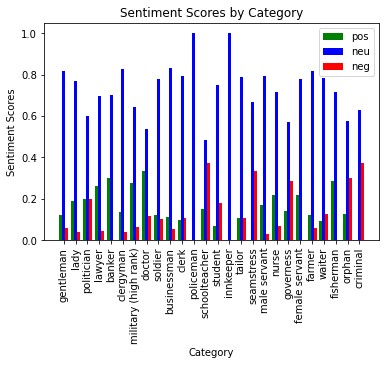

In [3]:
# Sentiment Scores Graph
plot_scores_all_categories()

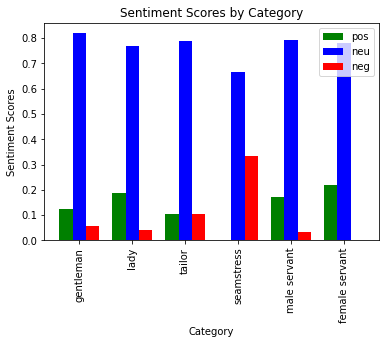

In [4]:
plot_sentiments_gender_categories()

The professions are roughly organized by social status from highest to lowest, i.e. from “gentleman” to “criminal”, though there is some nuance in how this is interpreted. We see no obvious trends over the social hierarchy, though there is perhaps a tendency to use stronger positive words for higher class professionals, and stronger negative sentiments for the lowest classes. There also seems to be a strong negative association with words related to schoolteacher.

While positive, neutral and negative can tell us something about the general connotations of a list of adjectives, it does not allow us to see specifically what words were used. To get a sense of the adjectives found for each occupation, we used the WordCloud library to aggregate adjectives and size them based on their frequency. Here we can see these outputs for a selection of professions that had a large number of adjectives. 

If you would like to see the adjective wordclouds for all professions, run the code below.  Some of the search words have no adjectives, this code also tells us what words have no adjectives associated with them. Note that this will produce a lot of output.

In [ ]:
# DISCLAIMER: Shows ALL WordClouds
make_word_clouds_all_categories()

It can be interesting to compare similar professions of different rank. From our analysis we found that the types of adjectives used for captains, generals, and other high-ranking military are thematically different from those used for soldiers.

In [ ]:
# WordCloud for High rank military versus soldier


This may indicate that dickens had a respect for high-ranking military men, but found soldiers to be common drunkards. Alternatively, this could be a reflection of the general attitudes held toward these individuals at the time and may be written into the language of the characters.

In [ ]:
# WordCloud for Lawyers

Dickens apparently did not like lawyers very much, as many biographers of his have noted. Many of the words he uses are, however, seemingly positive or merely descriptive (such as “English”). However, further context might reveal irony in the author’s tone, this is therefore another limitation of this type of analysis

In [ ]:
# Male servant versus female servant


Splitting professions by gender gives us some insight into gender bias in Dickens writing. Two comparable categories are those of male and female servants. If we look at the word clouds for each of these we find that there is a much more varied language for describing male servants, and that female servants, while generally described in a positive light, are more frequently described with words relating to appearance and obedience. The view of women overall appears to be more objectifying.

## Conclusion

While analyzing linguistic data at the word level can result in interesting, and often amusing results, this method is far from perfect. Today’s natural language processing tools are severely limited in what they can do, in part because human language is chaotic, nuanced, and unpredictable. This is not something computers are particularly well adapted for. Analyzing text computationally can be a powerful tool for reducing human error and filtering for possible bias, but we must never forget that algorithms are written by humans, and humans have bias. For example, if a text is written in a dialect to reflect the speech of a particular group of people, the words in that text may not be recognized as “correct” English and may not be analyzed by the algorithm at all. 

This project has taught us a great deal about the applications and limitations of natural language processing. We also explored different ways of analyzing linguistic data and compared the values and limitations of different synthesizing techniques, such as word clouds versus numerical scores. The biggest challenge with this project was finding the best way to process large amounts of text in a way that returns the highest quality of linguistic data. The data produced in this project is full of holes and imperfections, but more complicated analysis requires more computational resources as the program must deal with the intricacies of English Grammar.

Further development of this project might involve comparing the language of different authors. This would give a better sense of whether or not the adjectives used are a reflection of personal opinion, or merely the way writers in general choose to portray certain individuals. Expanding the scope of the program to capture more context than simply adjective-noun pairing would also give more nuanced and useful data for literary analysis.
